# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Reading the dataset

In [3]:
# Loading dataset
visa = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [5]:
visa.loc[visa["no_of_employees"] < 0].shape

(33, 12)

<IPython.core.display.Javascript object>

In [12]:
col = visa["no_of_employees"]
rows = visa["no_of_employees"] < 0
visa.loc[rows].shape

(33, 12)

<IPython.core.display.Javascript object>

## Data Overview

### View the first 5 rows of the dataset

In [122]:
# view the first 5 rows of the dataset
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>


- The dataset consist of 12 columns, with each row representing a unique case.
- Many employees are from Asia.
- The majority of employees hold full-time positions and are on yearly salary contracts.

In [123]:
# view the last 5 rows of the dataset
visa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

### Understand the shape of the dataset


In [73]:
# view the shape of the dataset
visa.shape

(25480, 11)

<IPython.core.display.Javascript object>

- The dataset contains information (12 attributes) about 25480 cases.

### Check the data types of the columns for the dataset

In [74]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


<IPython.core.display.Javascript object>

* The dataset contains 9 object type columns and 3 numerical (float and int type) columns. 
* `case_id` is of object type, which is a unique identifier.
* The target variable is `case_status`, which is of object type.
* All columns have 25480 entires, indicating that there are no missing values in the data.

### Checking for duplicate values


In [126]:
# checking for duplicate values
visa.duplicated().sum()


0

<IPython.core.display.Javascript object>

- There are no duplicated values in the data.

 ### Check for missing values

In [127]:
# checking for missing values
visa.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values in the dataset.

**Dropping the columns with all unique values**

In [128]:
# checking the number of unique values
visa["case_id"].nunique()

25480

<IPython.core.display.Javascript object>

In [129]:
# drop the 'case_id' column from the dataframe
visa = visa.drop(["case_id"], axis=1)
visa.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

- The `case_id` column contains only unique values, so we went ahead and dropped it.

## Exploratory Data Analysis (EDA)



### Getting the statistical summary for the numerical variables

In [130]:
# Get the numerical summary statistics
visa.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

-  The dataset contains employees from 6 different continents, with the largest portion coming from Asia.
-  A majority of the employees hold a Bachelor's degree, reflecting a well-educated workforce.
-  Most of the employees have prior work experience without any job training required, indicating a seasoned and experienced talent pool.
-  The companies sponsoring the employees have an average of 5667 employees. The minimum value shows a negative value, which is not feasible in a real-life scenario. This discrepancy needs to be carefully examined and validated to ensure the accuracy and reliability of the data. The presence of a wide gap between the maximum value and the 75th percentile suggests potential outliers in this column.
-  The sponsoring companies' establishment years range from 1800 to 2016, indicating a wide span of corporate histories.
-  The dataset includes sponsoring companies from 5 different regions, with the Northeast region being the most dominant location. 
- On average, employees receive a wage of around $74456. The substantial difference between the maximum value and the 75th percentile raises the possibility of outliers in this column.
-  The majority of the cases were certified at the end. 

#### Fixing the negative values in number of employees columns

In [131]:
# checking negative values in the employee column
negative_values = visa.loc[visa['no_of_employees'] < 0]

# Print the shape of the DataFrame containing negative values
print(negative_values.shape)


(33, 11)


<IPython.core.display.Javascript object>

- There are 33 cases in the dataset that has a negative value for `no_of_employees`. We will go ahead and convert these values to a positive number.

In [132]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

<IPython.core.display.Javascript object>

In [133]:
# convert the values to a positive number
data["no_of_employees"] = abs(data["no_of_employees"])

<IPython.core.display.Javascript object>

#### Checking the count of each unique category in each of the categorical variables

In [134]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing the count of each unique value in each column
for column in cat_col:
    value_counts = data[column].value_counts()
    print(value_counts)
    print("-" * 40)

    normalized_counts = value_counts / len(data)
    print(normalized_counts)
    print("-" * 40)
    print()
    print()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
----------------------------------------
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64
----------------------------------------


Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
----------------------------------------
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64
----------------------------------------


Y    14802
N    10678
Name: has_job_experience, dtype: int64
----------------------------------------
Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64
---------------------------------------

<IPython.core.display.Javascript object>

- More than half of the employees come from Asia.
- Over 90% of the employees in the dataset are on a yearly salary.
- Nearly 90% of the employees hold full-time positions.
- More than half of the employees (67%), successfully attained visa certification.

### Univariate Analysis

In [135]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

`no_of_employees`

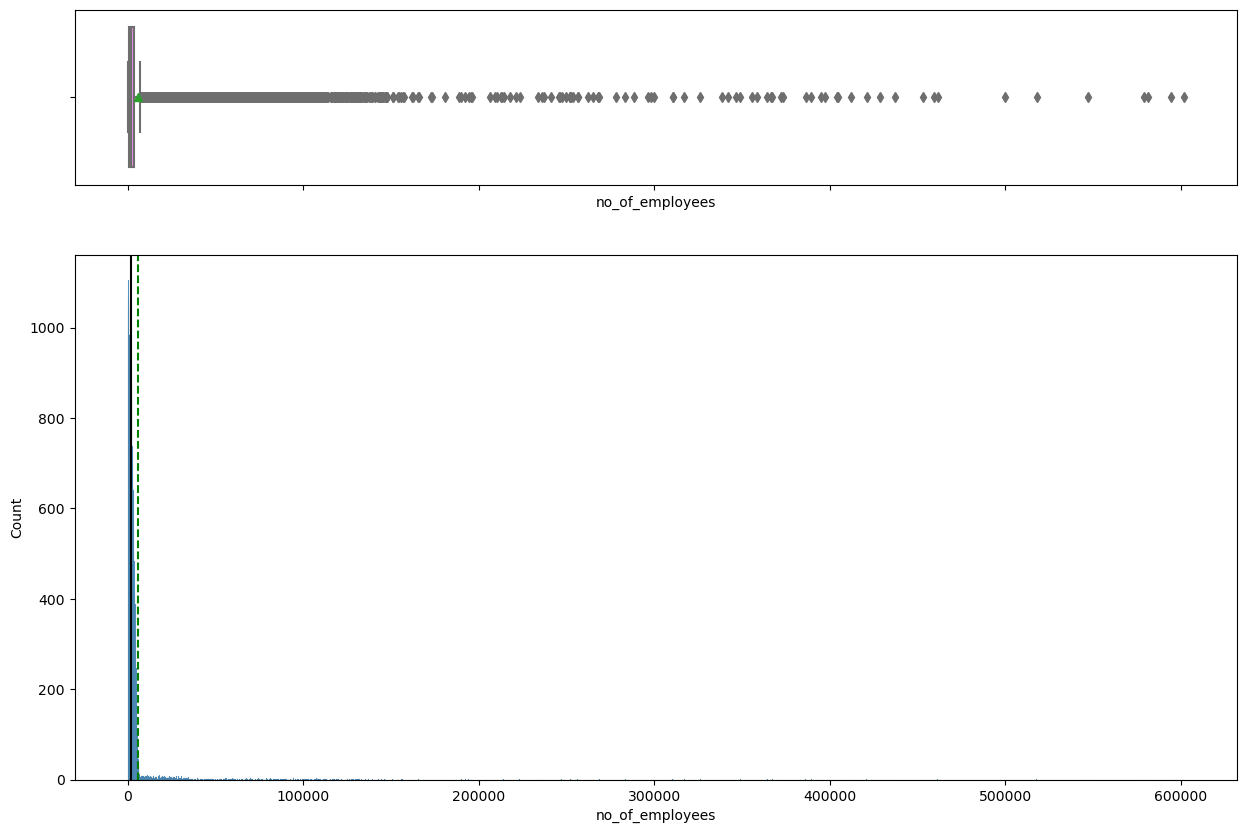

<IPython.core.display.Javascript object>

In [136]:
#  creating a histogram_boxplot for 'no_of_employees'
histogram_boxplot(data, "no_of_employees")

- The distribution is heavily right-skewed, suggesting that most companies have a relatively small workforce. 
- Approximately 75% of companies have less than 3000 employees, whereas, almost 99% of the companies have less than 100000 employees, indicating only a few companies have a substantial number of employees, while the majority remains relatively smaller in size.
- Remarkably, there are a few companies with an extraordinary number of employees, reaching up to 602069. These companies stand out as significant outliers in the distribution.

`prevailing_wage`

In [ ]:
#  creating a histogram_boxplot for 'prevailing_wage'
histogram_boxplot(data, "prevailing_wage")

In [ ]:
# checking the observations which have less than 5000 prevailing wage
data[data["prevailing_wage"] < 5000].count()

- The distribution is slightly right skewed. 
- Majority of the employees make less than 100000 dollars, but there are a handful of employees are making very good salary up to 300000 dollars.
- It is notable that a substantial number of employees in the dataset earn less than 5000 dollars, strongly suggesting that a significant proportion of these individuals are likely on hourly or monthly wages.

In [137]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

`continent`

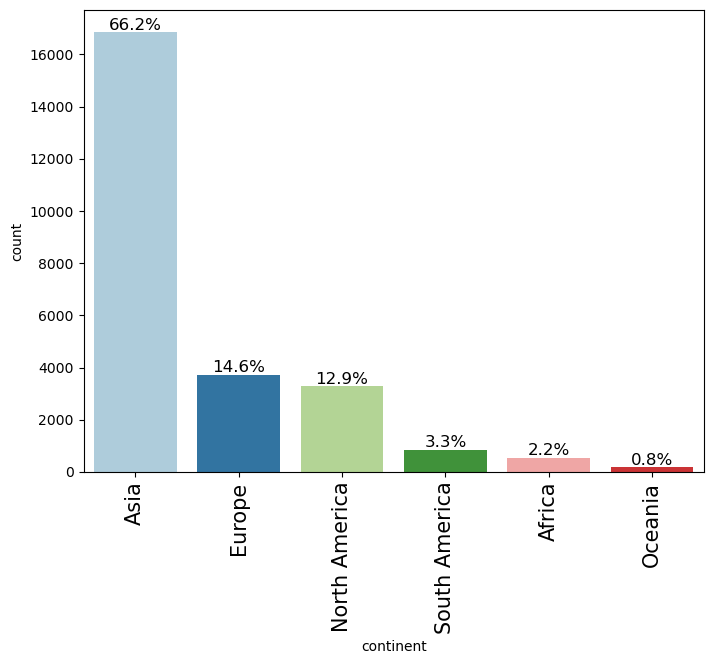

<IPython.core.display.Javascript object>

In [138]:
# Create a barplot for 'continent'
labeled_barplot(data, "continent", perc=True)

- Over 66% of employees are from Asia, followed by Europe (14.6%) and North America (12.9%).

`educaiton_of_employee`

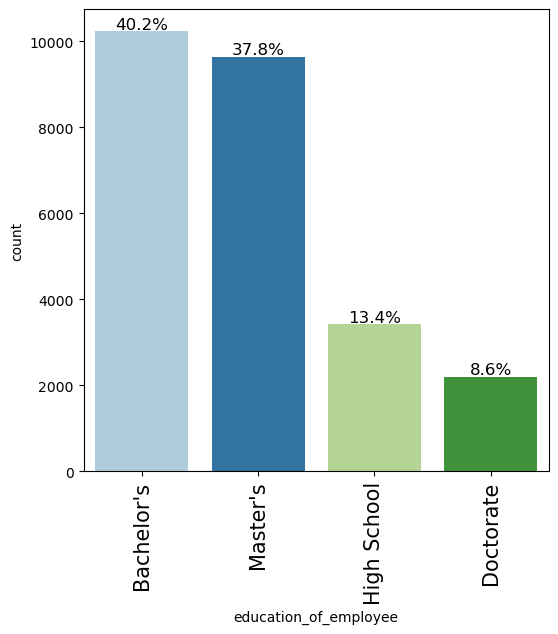

<IPython.core.display.Javascript object>

In [139]:
# Create a barplot for 'education_of_empoyee'
labeled_barplot(data, "education_of_employee", perc=True)

- The data reveals a nearly equal number of employees with Bachelor's degrees (around 40%) and Master's degrees (around 38%). There's a small group of employees hold a Doctorate degree (~9%).

` has_job_experience `

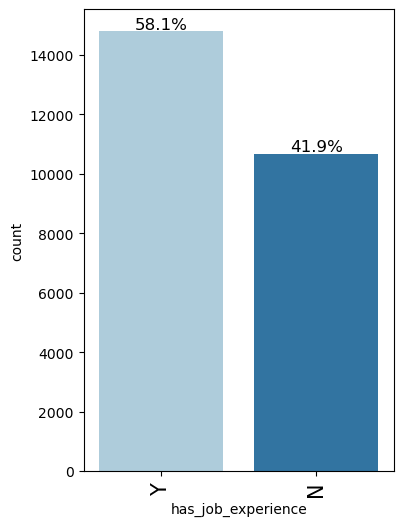

<IPython.core.display.Javascript object>

In [140]:
# Create a barplot for 'has_job_experience'
labeled_barplot(data, "has_job_experience", perc=True)

- Over half of employees have prior job experience.

`requires_job_training`

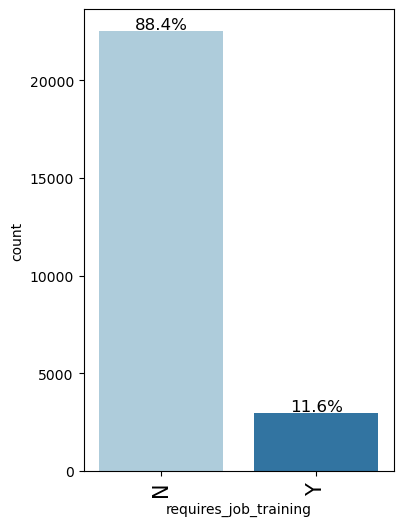

<IPython.core.display.Javascript object>

In [141]:
# Create a barplot for 'requires_job_training'
labeled_barplot(data, "requires_job_training", perc=True)

- Over 88% of employees do not require job training.

`region_of_employment`

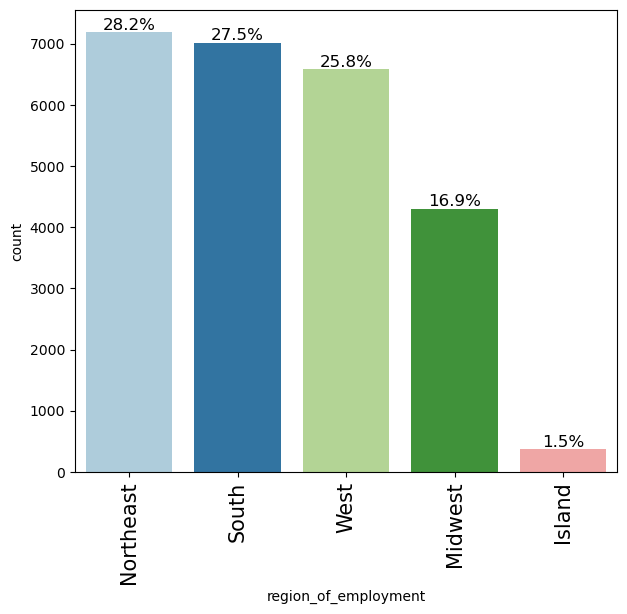

<IPython.core.display.Javascript object>

In [142]:
# Create a barplot for 'region_of_employment'
labeled_barplot(data, "region_of_employment", perc=True)

- There is a roughly similar number of sponsoring companies located in the Northeast, South, and West regions. 

`unit_of_wage`

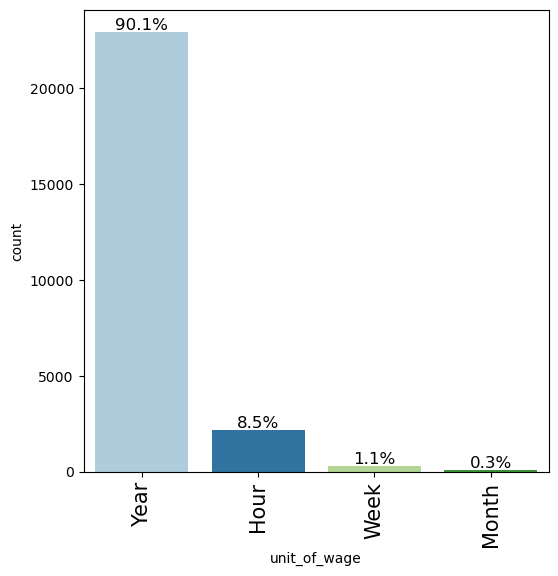

<IPython.core.display.Javascript object>

In [143]:
# Create a barplot for 'unit_of_wage'
labeled_barplot(data, "unit_of_wage", perc=True)

- Over 90% of employees in this dataset are on yearly salary, and only 8.5% of employees are on hourly wage. There are only a small amount of employees are on weekly or monthly salary.

`full_time_position `

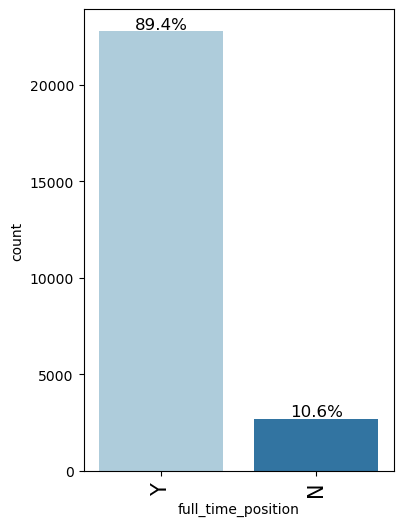

<IPython.core.display.Javascript object>

In [144]:
# Create a barplot for 'full_time_position'
labeled_barplot(data, "full_time_position", perc=True)

- Almost 90% of employees hold a full time position.

`case_status `

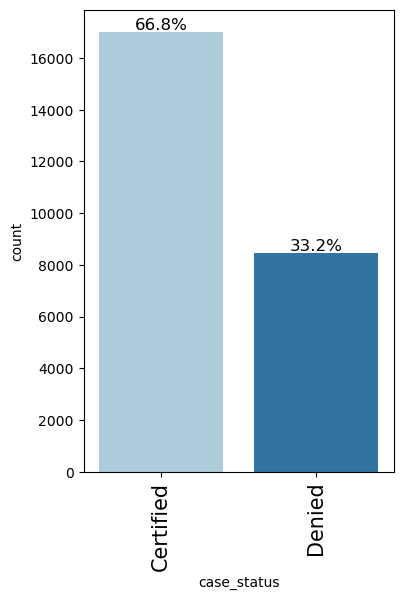

<IPython.core.display.Javascript object>

In [145]:
# Create a barplot for 'case_status'
labeled_barplot(data, "case_status", perc=True)

- Almost 67% of employees' visa application was certified at the end. 

### Bivariate Analysis

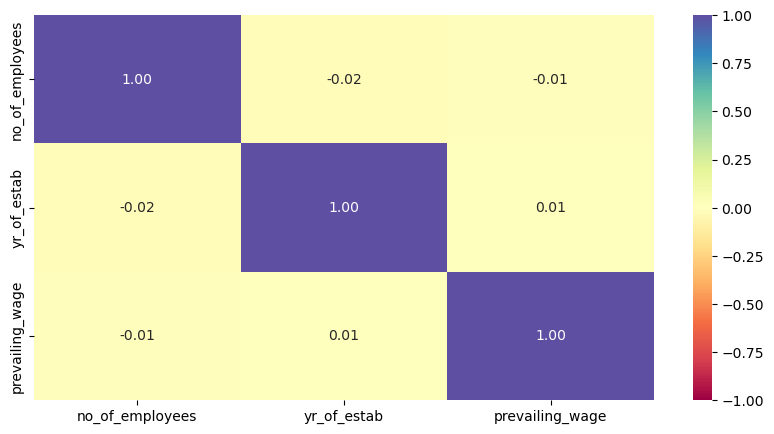

<IPython.core.display.Javascript object>

In [146]:
# finding the correlation between the variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- There are no correlations between any of the numerical variables.

In [147]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [148]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

`education_of_employee` vs `case_status`

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


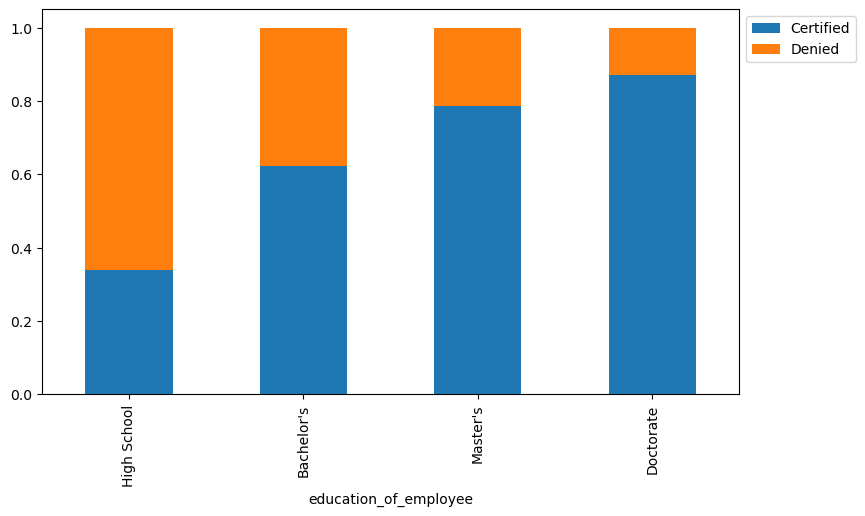

<IPython.core.display.Javascript object>

In [149]:
# create a stacked_barplot for 'educaiton_of_employee' and 'case status'
stacked_barplot(data, "education_of_employee", "case_status")

- The data clearly indicates that employees with higher education have a higher likelihood of getting their visas certified.
- Only over 30% of employees with a High School degree have their visa granted. 
- Almost 90% of employees with a doctorate degree had their visas granted, highlighting a strong correlation between advanced education and visa certification.

`education_of_employee` vs `reion_of_employment`

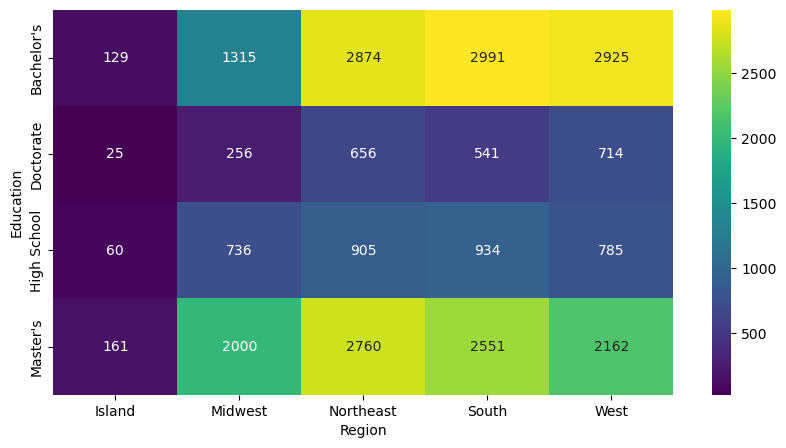

<IPython.core.display.Javascript object>

In [150]:
# plot heatmap for the crosstab between 'education_of_employee' and 'region of employment'
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

- Sponsoring companies located in the Northeast, South, and West regions tend to hire the most employees with advanced degrees.
- Companies from the Island region hire the least number of employees with advanced degrees compared to the other regions. This trend may be influenced by factors such as the relatively lower number of visa applications and job opportunities originating from the Island region.

`region_of_employment` vs `case_status`

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


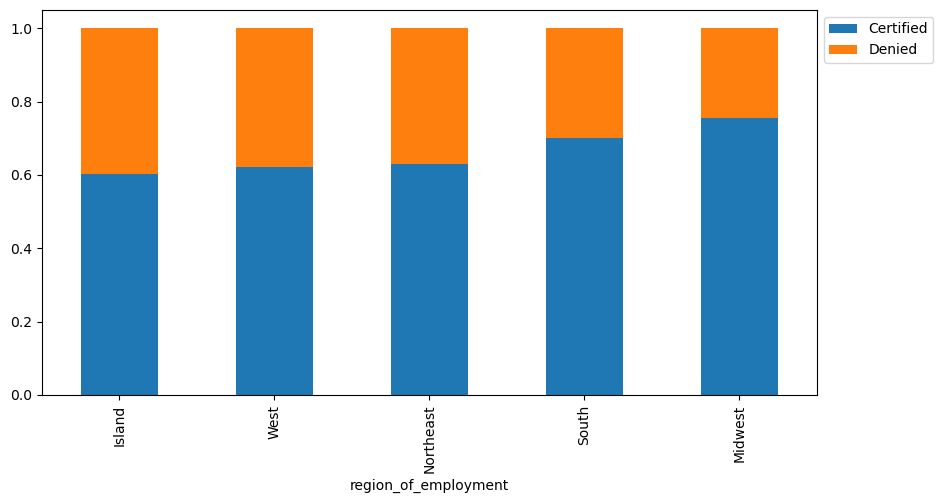

<IPython.core.display.Javascript object>

In [151]:
# create a stacked_barplot for 'region_of_employment' and 'case status'
stacked_barplot(data, "region_of_employment", "case_status")

- There is not a significant difference in terms of visa approval rates between regions.
- Employees working for companies in the Midwest and South regions exhibit relatively higher visa approval rates.
- Companies in the Island, West, and Northeast regions display similar visa approval rates.

`education_of_employee` vs `continent`

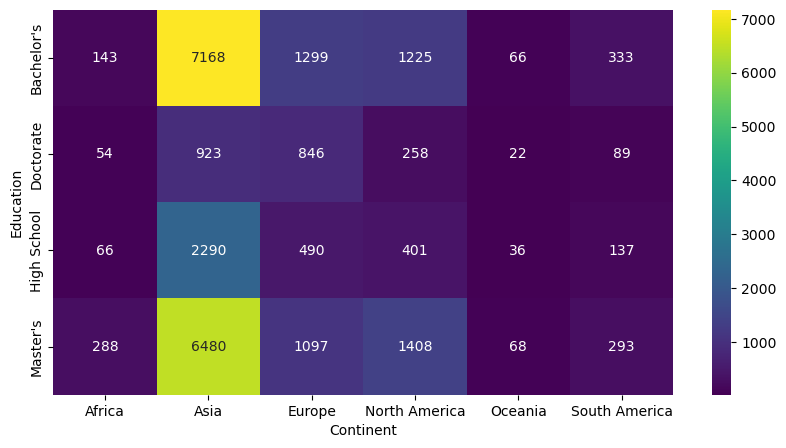

<IPython.core.display.Javascript object>

In [160]:
# plot heatmap for the crosstab between 'education_of_employee' and 'continent'
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["continent"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("Education")
plt.xlabel("Continent")
plt.show()

- Asia continent has the most employees with advanced education degrees applied for the visas.

`continent` vs `case_status`

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


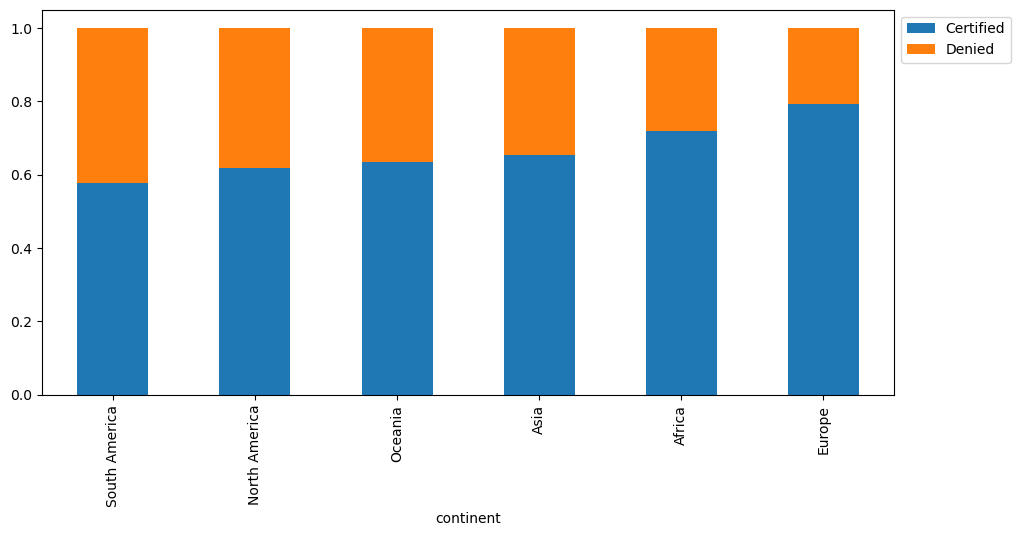

<IPython.core.display.Javascript object>

In [152]:
# create a stacked_barplot for 'continent' and 'case status'
stacked_barplot(data, "continent", "case_status")

- Employees from Europe have the highest visa approval rate, followed by Africa and Asia. 
- Compared to Europe and Africa, there are more highly educated employees from Asia applied for visas, but they didn't receive as many certifications as expected. This suggests that factors beyond education may have a significant impact on the visa process. 

`has_job_experience` vs `case_status`

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


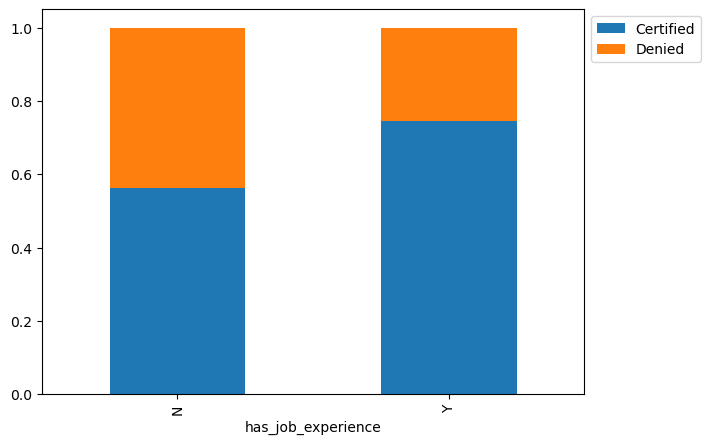

<IPython.core.display.Javascript object>

In [153]:
# create a stacked_barplot for 'has_job_experience' and 'case status'
stacked_barplot(data, "has_job_experience", "case_status")

- Employees with job experience tend to have a higher visa approval rate compared to those without prior work experience.

`has_job_experience` vs `requires_job_training`

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


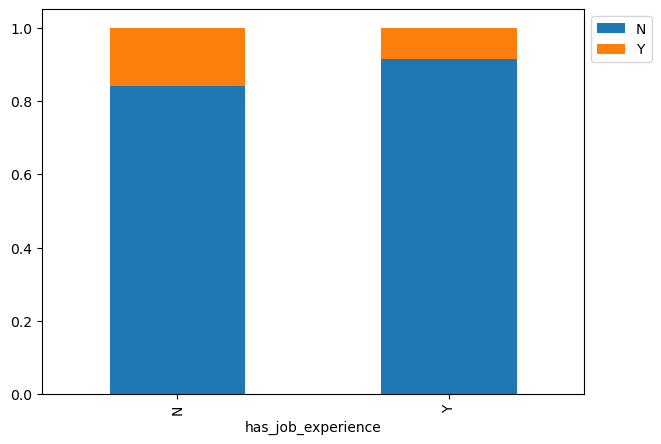

<IPython.core.display.Javascript object>

In [154]:
# create a stacked_barplot for 'has_job_experience' and 'requires_job_training'
stacked_barplot(data, "has_job_experience", "requires_job_training")

- The distribution makes it evident that employees with job experience tend to have a higher probability of not requiring training. 

`unit_of_wage` vs `case_status`

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


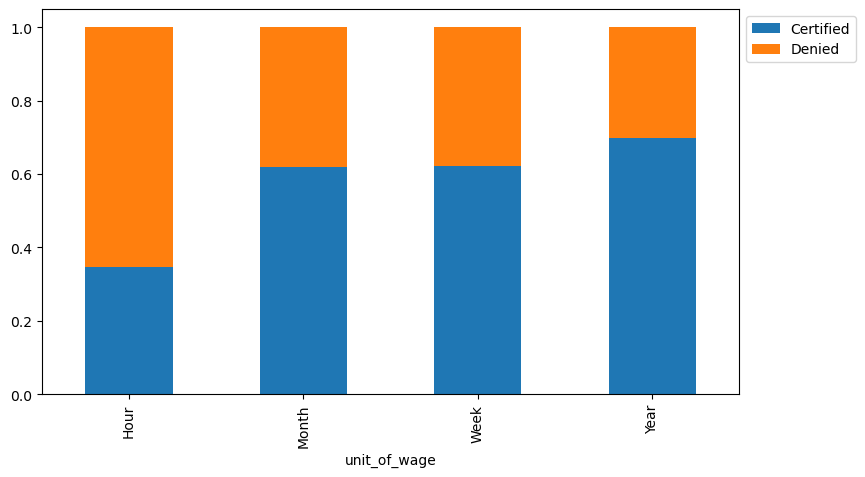

<IPython.core.display.Javascript object>

In [111]:
# create a stacked_barplot for 'unit_of_wage' and 'case status'
stacked_barplot(data, "unit_of_wage", "case_status")

- Employees who are on a yearly salary exhibit the highest visa approval rate (~75%).
- Employees on a monthly wage and those on a weekly wage have similar visa approval rate, both slightly lower than the yearly salary group. 
- Employees on a hourly wage have the lowest visa approval rate (~35%).

`prevailing_wage` vs `case_status`

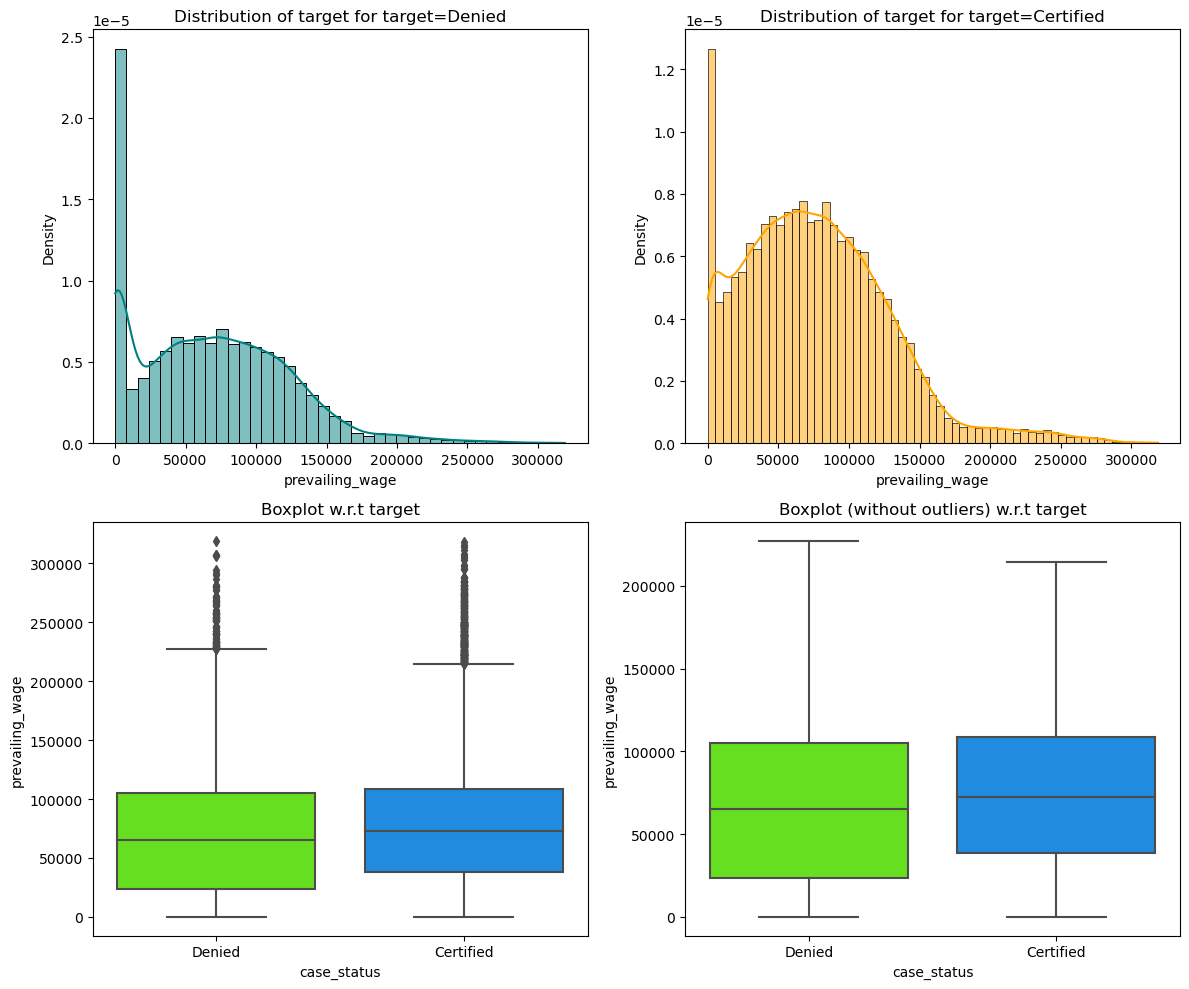

<IPython.core.display.Javascript object>

In [118]:
# create a disctribution plot for 'prevailing_wage' and a boxplot for 'prevailing_wage' vs 'case_status' with respect
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

- Surprisingly, the average wage for employees whose visas are certified is only slightly higher than those whose visas are not certified. However, this difference is very minimal, indicating that visa approval rate does not seem to be strongly influenced by the average wage of the employees. 

`prevailing_wage` vs `region_of_employment`

<AxesSubplot:xlabel='region_of_employment', ylabel='prevailing_wage'>

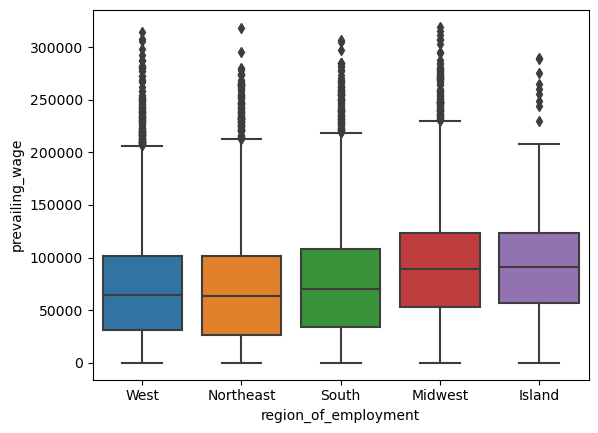

<IPython.core.display.Javascript object>

In [117]:
# create a  boxplot for 'prevailing_wage' and 'region_of_employment'
sns.boxplot(data=data, y="prevailing_wage", x="region_of_employment")

- Companies located in the Midwest and Island regions tend to offer slightly higher wages to their employees compared to companies in other regions.
- Companies offer similar wage across West, Northeast, and South regions.

`prevailing_wage` vs `unit_of_wage`

<AxesSubplot:xlabel='unit_of_wage', ylabel='prevailing_wage'>

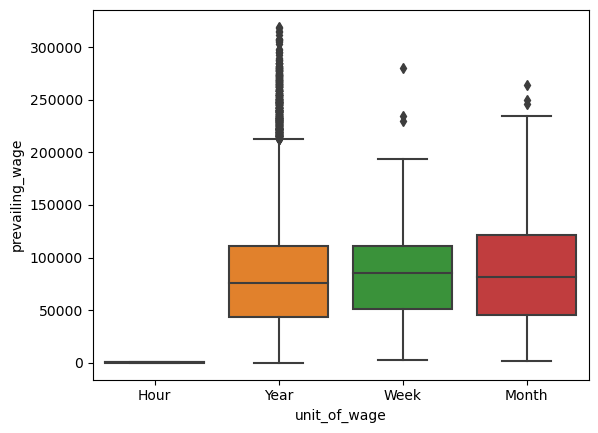

<IPython.core.display.Javascript object>

In [119]:
sns.boxplot(data=data, x="unit_of_wage", y="prevailing_wage")

- Surprisingly, there's not a big difference in terms of average wage in terms of yearly, weekly and monthly wage. This need to be further examined. 

## Data Preprocessing

### Outlier Check

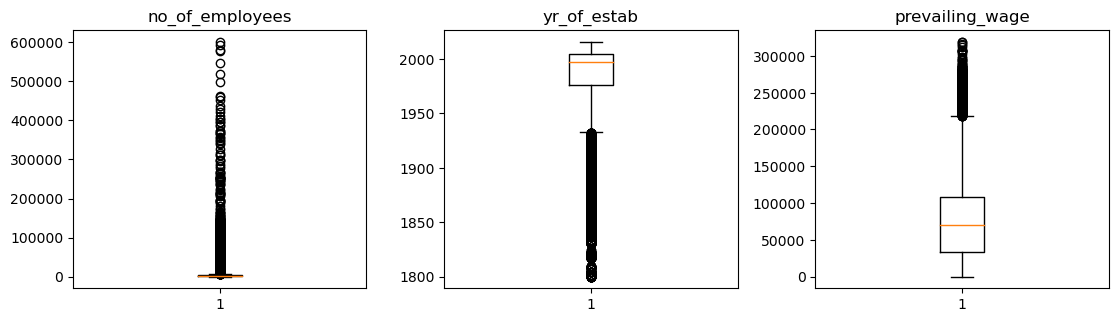

<IPython.core.display.Javascript object>

In [120]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are outliers present in a couple variables. However, these outliers will not be treated as they are proper values.

### Data Preparation for model building

In [ ]:
data['case_status'].map{'Certified':1, 'Not_Certified':0})

In [ ]:
data['case_status']=np.where(data['case_status']='Certified', 1,0)

In [9]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Separating features and the target column
X = data.drop("case_status", axis=1)
y = data["case_status"]

<IPython.core.display.Javascript object>

In [10]:
# create dummies for X
X = pd.get_dummies(X, drop_first=True)

<IPython.core.display.Javascript object>

In [11]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [12]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

## Model evaluation criterion


### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

In [13]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [14]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


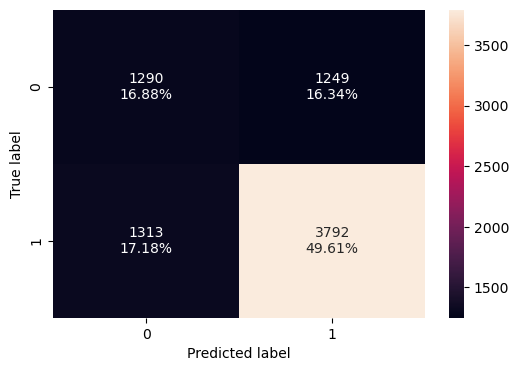

<IPython.core.display.Javascript object>

In [59]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", d_tree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [64]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 8, 2),
    "min_samples_leaf": [2, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=2,
                       random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


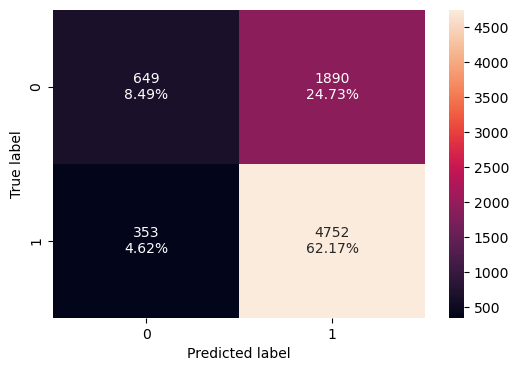

<IPython.core.display.Javascript object>

In [65]:
# Calculating different metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

- The overfitting is reduced after hyperparameter tuning and the model is generalizing well.
- Both recall and F1 have increased slightly.

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887
   Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


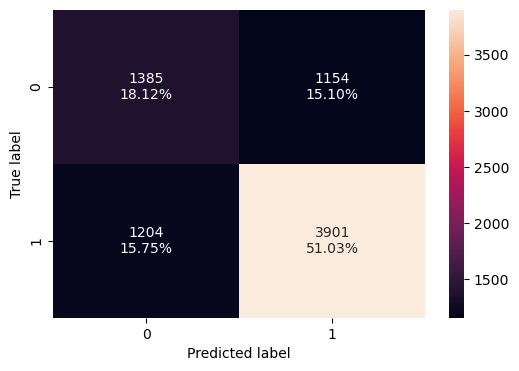

<IPython.core.display.Javascript object>

In [33]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print(bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Bagging classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning


In [35]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.5, 0.7],
    "max_features": [0.3, 0.5, 0.7],
    "n_estimators": [120, 130, 150],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.5, n_estimators=150,
                  random_state=1)

<IPython.core.display.Javascript object>

   Accuracy    Recall  Precision        F1
0  0.970004  0.998741   0.958125  0.978012
   Accuracy    Recall  Precision        F1
0  0.730508  0.900881    0.74744  0.817019


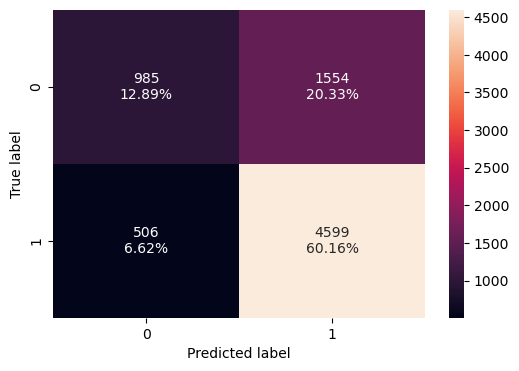

<IPython.core.display.Javascript object>

In [36]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print(bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

- The bagging classifier model is still slitghly overfitting after tunning the hyperparameters.
- Both recall and F1 have increased.

### Random Forest Classifier


Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


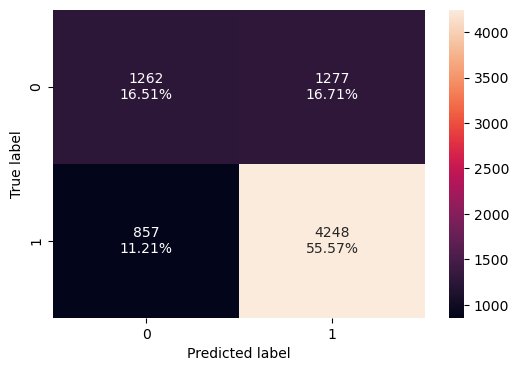

<IPython.core.display.Javascript object>

In [37]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

- Random forest is giving a slightly higher test F1 score than decision trees and bagging classifiers, but it is overfitting the training data.

### Hyperparameter Tuning


In [49]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": [20, 30],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093


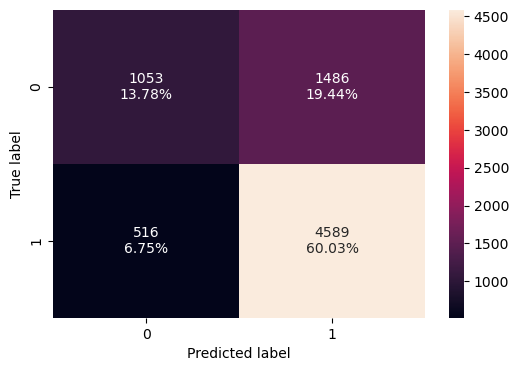

<IPython.core.display.Javascript object>

In [50]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

- Random forest model is generalizing well after hyperparameter tuning.
- We have a balanced F1 score between training and testing data.

## Boosting - Model Building and Hyperparameter Tuning


### AdaBoost Classifier

   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


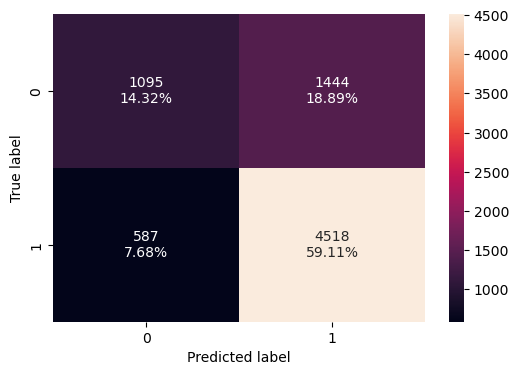

<IPython.core.display.Javascript object>

In [22]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

- Adaboost is giving a more generalized performance than previous models with a high F1 score.

### Hyperparameter Tuning

In [42]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

   Accuracy    Recall  Precision        F1
0  0.719163  0.781415    0.79469  0.787997
   Accuracy    Recall  Precision        F1
0  0.716641  0.781587    0.79151  0.786517


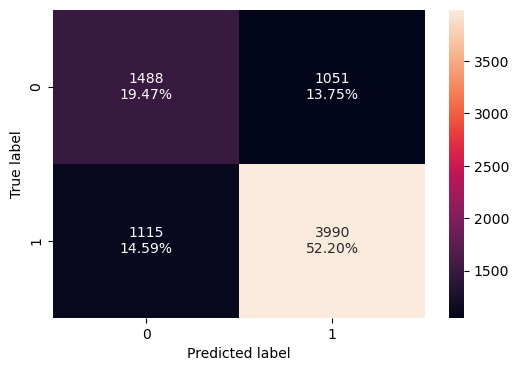

<IPython.core.display.Javascript object>

In [43]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print(abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

- The model is performing well with tunned hyperparameters, however, the F1 score has reduced.

### Gradient Boosting Classifier

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


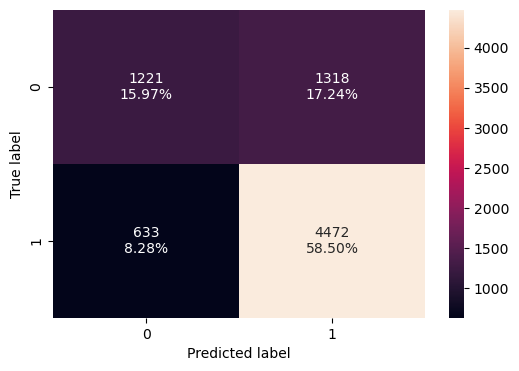

<IPython.core.display.Javascript object>

In [44]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

- The gradient boosting classifier is generalizing well with highest F1 score compare to other models.


### Hyperparameter Tuning

In [47]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150, 180, 200],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=150, random_state=1,
                           subsample=0.8)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision       F1
0  0.761662  0.881894   0.786966  0.83173
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.743459  0.87287   0.772538  0.819645


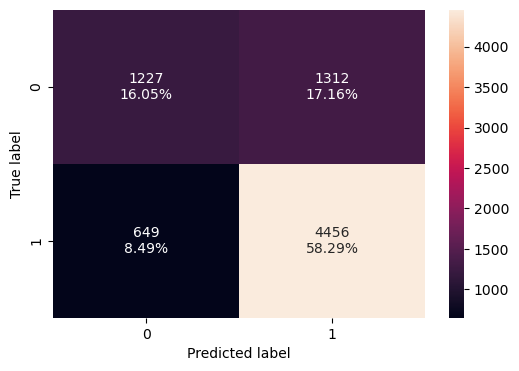

<IPython.core.display.Javascript object>

In [48]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

- The tunned model is not much different from the model with default parameters. F1 score has reduced slightly.

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


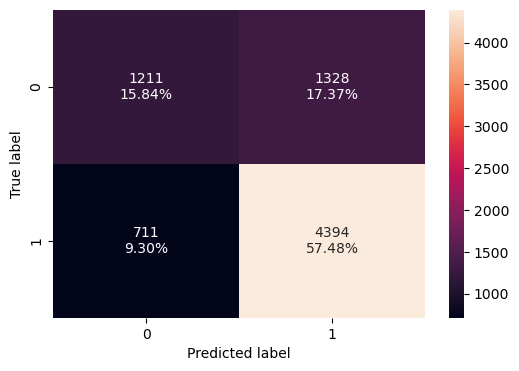

<IPython.core.display.Javascript object>

In [52]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

- The XGBoost model is generalizing well. However, the F1 score is lower than the Gradient Boost model.


### Hyperparameter Tuning 

In [54]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150, 200],
    "scale_pos_weight": [1, 2],
    "subsample": [1, 1.2],
    "learning_rate": [0.05, 0.1],
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.764745  0.881894   0.790222  0.833545
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.74529  0.872478   0.774609  0.820636


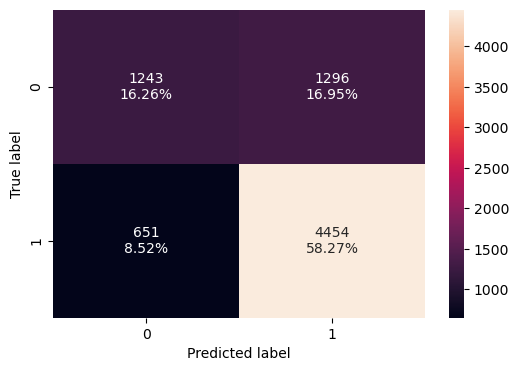

<IPython.core.display.Javascript object>

In [55]:
# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

- XGBoost model is generalizing well after tuning.
- F1 score has increased.

## Stacking Classifier

In [56]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gb_classifier),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbac...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
           

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.766652  0.892806   0.786628  0.836361
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.743066  0.87953   0.768967  0.820541


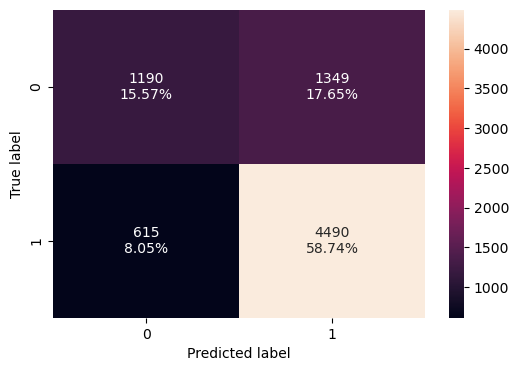

<IPython.core.display.Javascript object>

In [57]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

- Stacking model is performing very well with a balanced F1 score on training and testing data.

## Model Performance Comparison and Final Model Selection

In [66]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.999944,0.769119,0.985198,0.970004,0.738226,0.719163,0.758802,0.761662,0.838753,0.764745,0.766652
Recall,1.0,0.931923,0.999916,0.918660,0.985982,0.998741,0.887182,0.781415,0.883740,0.881894,0.931419,0.881894,0.892806
Precision,1.0,0.720067,1.000000,0.776556,0.991810,0.958125,0.760688,0.794690,0.783042,0.786966,0.843482,0.790222,0.786628
F1,1.0,0.812411,0.999958,0.841652,0.988887,0.978012,0.819080,0.787997,0.830349,0.831730,0.885272,0.833545,0.836361


<IPython.core.display.Javascript object>

In [67]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.720827,0.738095,0.691523,0.730508,0.734301,0.716641,0.744767,0.743459,0.733255,0.745290,0.743066
Recall,0.742801,0.930852,0.832125,0.898923,0.764153,0.900881,0.885015,0.781587,0.876004,0.872870,0.860725,0.872478,0.879530
Precision,0.752232,0.715447,0.768869,0.755391,0.771711,0.747440,0.757799,0.791510,0.772366,0.772538,0.767913,0.774609,0.768967
F1,0.747487,0.809058,0.799247,0.820930,0.767913,0.817019,0.816481,0.786517,0.820927,0.819645,0.811675,0.820636,0.820541


<IPython.core.display.Javascript object>

- Tuned Random forest overall gives a more generalized performance compared to other models and achieves the highest F1 score on test data.

### Feature importance of Tuned Random Forest


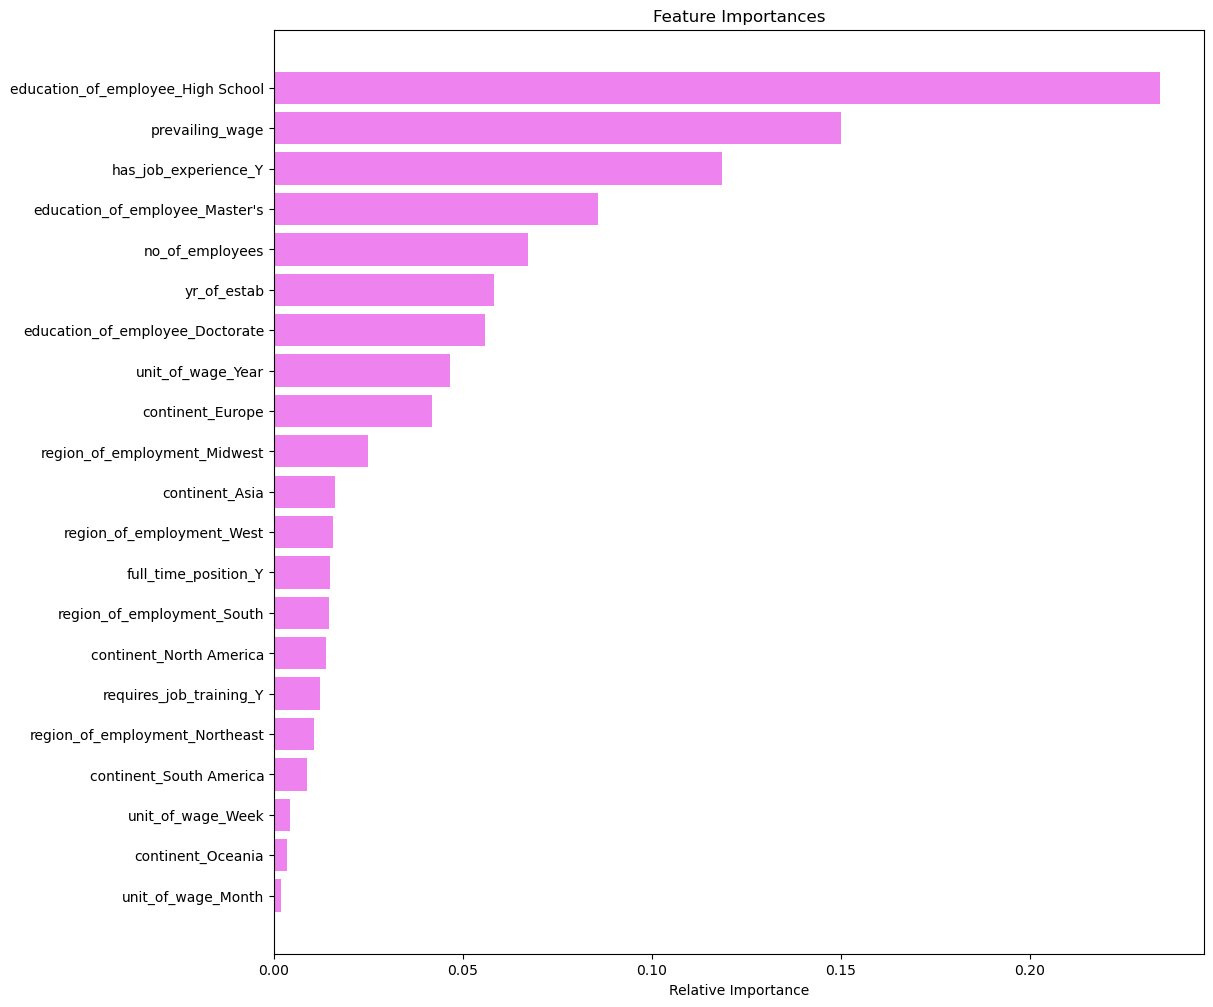

<IPython.core.display.Javascript object>

In [70]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- `education_of_employee_High_School` is the most important feature in identifying visa certification followed by `has_job_experience` and `prevailing_wage`.

## Actionable Insights and Recommendations

### Insights:

**Education**: The data suggests that education indeed plays a significant role in determining visa certification outcomes. Employees with advanced degrees (Doctorate, Master's and Bachelor's) are more likely to receive visa certifications. 

**Wage**: Employees who are on yearly salaries of approximately 70k or higher have a higher likelihood of receiving visa certifications. 

**Job Experience**: Employees with job experience tend to have a higher chances of receiving visa certifications compared to those without prior work experience. 


**Continent**: Employees from Europe, Africa, and Asia have higher chances of receiving visa certifications.


**Company Region**: Employees who are hired by Mid-West region have more chances of receiving visa certifications compared to employees who work for other regions.


### Recommendations:

- It's notable that employees from Asia with advanced degrees lose out on visa certifications compare to employees from Europe and Africa. Further exploration and examination of potential contributing factors behind this finding may offer valuable insights.
- Additional data related to employees' profession, age, and English proficiency can be collected to help understanding of visa certification dynamics. 